---
title: The Ames housing dataset
teaching: 45
exercises: 2
keypoints:
objectives:
questions:
- "Here we introduce the data we'll be analyzing"
---
# Intro to Ames Housing Dataset

Throughout this workshop, we will explore how to efficiently detect patterns and extract insights from high-dimensional data. We will focus on a widely accessible dataset known as the Ames housing data. This dataset will serve as a foundational example, allowing us to grasp the challenges and opportunities presented by high-dimensional data analysis.

## Load the dataset

Here we load the dataset from the sklearn library, and see a preview

In [15]:
from sklearn.datasets import fetch_openml

# load the dataset
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')

df_prelim = housing.data.copy(deep=True) # create new DataFrame copy of original dataset
df_prelim.head()                              # evaluate result

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

Unless you plan to fit mixed effects models, you can treat the "Id" column here as an index column, not a feature of the data. For mixed effects models, subject ID can be treated as a "random effect" and may actually be considered a feature in that case. We'll stick to standard regression models for this workshop. Let's adjust our df accordingly...

In [16]:
# df = df.astype({'Id': int})       # set data type of Id to int
df = df_prelim.set_index('Id')           # set Id column to be the index of the DataFrame
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
2          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
3          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
4          Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
5          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

   MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                               
1          NaN       0       2    2008        WD         Normal  
2          NaN       0       5    2007        WD         Normal  
3          NaN       0       9    2008        WD         Normal  
4          NaN       0       2    2006        WD        Abnorml  
5          NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

## Data Exploration
From running `df.head()`, we see that our dataframe contains 79 features or "dimensions". Is this data high-dimensional? Let's attempt to analyze the data and see if we encourter any problems associated with the "curse of dimensionality". 

To begin, let's do some basic exploratory analysis to better understand these features. 

2. What are all the feature names? What do the features represent?
3. What is the data type of each feature (e.g., text/categorical, numerical, binary, etc.)?
4. How many observations are there for most features? Which features have missing values?

In [2]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [21]:
import pandas as pd
# Adjust pandas settings to display all rows
pd.set_option('display.max_rows', None)

In [22]:
observations_per_feature = df.count()
sorted_observations = observations_per_feature.sort_values()
print("Number of observations per feature (sorted):")
print(sorted_observations)

Number of observations per feature (sorted):
PoolQC              7
MiscFeature        54
Alley              91
Fence             281
FireplaceQu       770
LotFrontage      1201
GarageYrBlt      1379
GarageType       1379
GarageFinish     1379
GarageQual       1379
GarageCond       1379
BsmtExposure     1422
BsmtFinType2     1422
BsmtFinType1     1423
BsmtCond         1423
BsmtQual         1423
MasVnrArea       1452
MasVnrType       1452
Electrical       1459
KitchenQual      1460
BedroomAbvGr     1460
HalfBath         1460
FullBath         1460
BsmtHalfBath     1460
BsmtFullBath     1460
KitchenAbvGr     1460
TotRmsAbvGrd     1460
MSSubClass       1460
Fireplaces       1460
GrLivArea        1460
GarageCars       1460
GarageArea       1460
PavedDrive       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
MoSold           1460
YrSold           1460
Functional       1460
LowQualFi

## 

#### EXERCISE_START: Exploring the data 
Let's do some basic exploratory analysis of our data before going any further. 

1. How many features are there?
2. What are all the feature names?
3. How many observations are there for most features? Which features have missing values?


#### EXERCISE_SOLUTION
1. `df.head()` tells us there are 79 features (not including index)
2. For the column names, we can use...

##### CODE_START
print(df.columns.tolist())
##### CODE_END
##### OUTPUT_START
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
##### OUTPUT_END

3. To find the number of observations for most features, you typically want to check how many non-null entries each feature has. You can do this by using the count() function, which counts non-null values:
##### CODE_START
observations_per_feature = df.count()
print("Number of observations per feature:")
print(observations_per_feature)
##### CODE_END

#### EXERCISE_END

#### EXERCISE: How many observations are there?
#### EXERCISE_SOLUTION 
1460
#### EXERCISE_END

#### EXERCISE: What are all the feature names?
#### EXERCISE_SOLUTION
##### CODE_START
print(df.columns.tolist())
##### CODE_END

##### EXERCISE_END

# How do I find out what these features mean?
## Read the Data Dictionary

In [3]:
from IPython.display import display, Pretty

# the housing object we created in step one above contains a Data Dictionary for the Dataset
display(Pretty(housing.DESCR))

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

## Feature Exercises

#### EXERCISE_START
What information is represented by BsmtFinType2?
#### EXERCISE_SOLUTION
Rating of basement finished area (if multiple types)
#### EXERCISE_END

#### EXERCISE_START
What type of variable is BsmtFinType2 (categorical or numeric, then nominal/ordinal or discrete/continuous)?
#### EXERCISE_SOLUTION
categorical, ordinate
#### EXERCISE_END

#### EXERCISE_START
What information is represented by GrLivArea?
#### EXERCISE_SOLUTION
Above grade (ground) living area square feet
#### EXERCISE_END

#### EXERCISE_START
What type of variable is GrLivArea? (categorical or numeric, then nominal/ordinal or discrete/continuous)?
#### EXERCISE_SOLUTION
numeric, discrete
#### EXERCISE_END



# Load the Target (Response) Variable - Housing Price

In [4]:
import pandas as pd

housing_price_df = pd.DataFrame(housing.target) # load data into dataframe
housing_price_df.describe()                     # create numeric summary of that data

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

## Price Exercises

#### EXERCISE_START
What is the range of housing prices in the dataset?
#### EXERCISE_SOLUTION
min: $34,900, max: $755,000
#### EXERCISE_END

#### EXERCISE_START 
Are the price data skewed? What distribution might you expect?
#### EXERCISE_SOLUTION
yes, positive/right handed skew. Expect positive/right handed skew from a long tail to outlier high values  
#### EXERCISE_END

# Plot housing price values

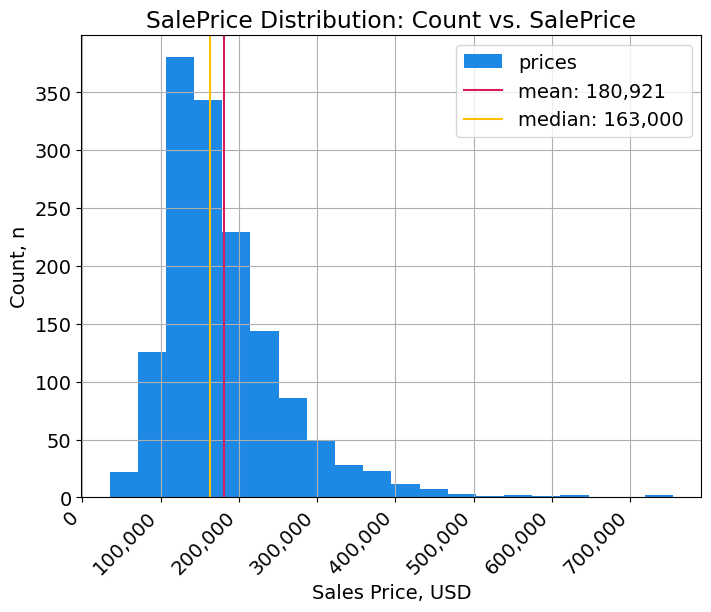

In [5]:
import helper_functions
helper_functions.plot_salesprice(
    housing_price_df,
    # ylog=True
)

# Summary

In this session we:
1. Introduced the Ames Housing Dataset
2. Determined the number of features and observations
3. Understood some variables
4. Viewed the 'target variable': SalePrice